# Task 4- Chaotic dynamics

In [1]:
from helpers.math import (
    calc_logistic_map_orbit,
    calc_lorenz_attractor,
    calc_trajectory_difference,
    calc_trajectory_passing_threshold,
)
from helpers.plots import (
    plot_logistic_map_bifurcation,
    plot_logistic_map_orbit,
    plot_lorenz_attractor,
    plot_trajectory_difference,
    plot_logistic_map,
    plot_lorenz_orbit,
)


# Part 1 - Logistic Map Bifurcation Analyses

In order to analyze the convergence of the logistic map equation for the interval r $\in$ (0,1) one can plot the orbit over time for n=100 discrete steps  with a step size of $\Delta r=0.2$ <br>
One can see that all r in this interval behave the same -> The population dies out independent of the initial population. (stable fix point at X=0) <br>
The same procedure can be done for the remaining intervals, which revealing a second fix point for all r $\in$ (1,3].

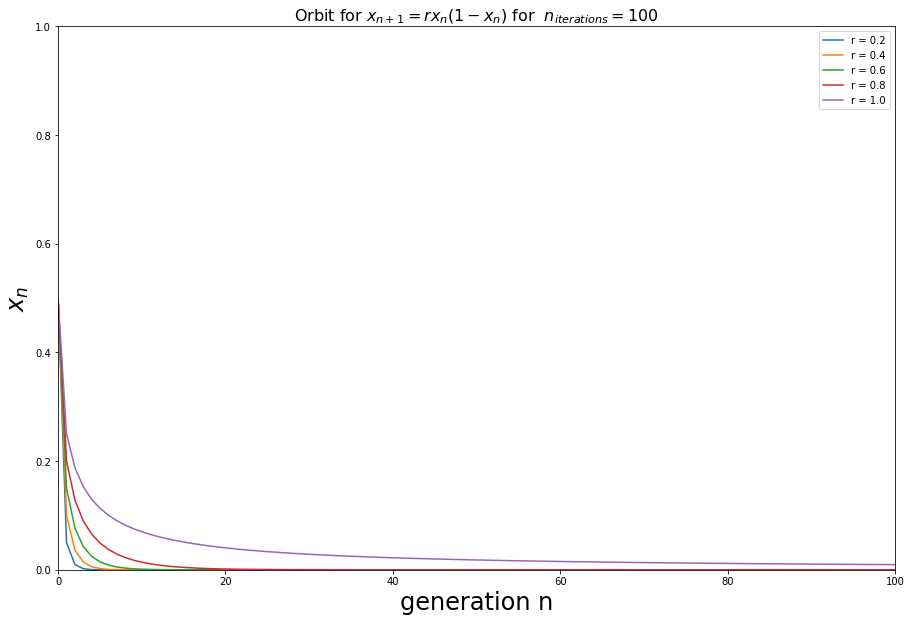

In [2]:
# plot orbits in dependence of the growth parameter r

orbit_r1, T, r1 = calc_logistic_map_orbit(0.2, 100)
orbit_r2, T, r2 = calc_logistic_map_orbit(0.4, 100)
orbit_r3, T, r3 = calc_logistic_map_orbit(0.6, 100)
orbit_r4, T, r4 = calc_logistic_map_orbit(0.8, 100)
orbit_r5, T, r5 = calc_logistic_map_orbit(1.0, 100)
r_values = [r1, r2, r3, r4, r5]
plot_logistic_map_orbit(T, r_values, orbit_r1, orbit_r2, orbit_r3, orbit_r4, orbit_r5)


# Analytical Assumptions
In order to find a formula for the location of the second fix point one can analyze the intersection of the parabolas with the straight line.<br>
This reveals that from certain slope (= certain r) a second intersection point (fix point) arises.<br>
This fix point can be found in $X=1-\frac{1}{r}$.

0.5


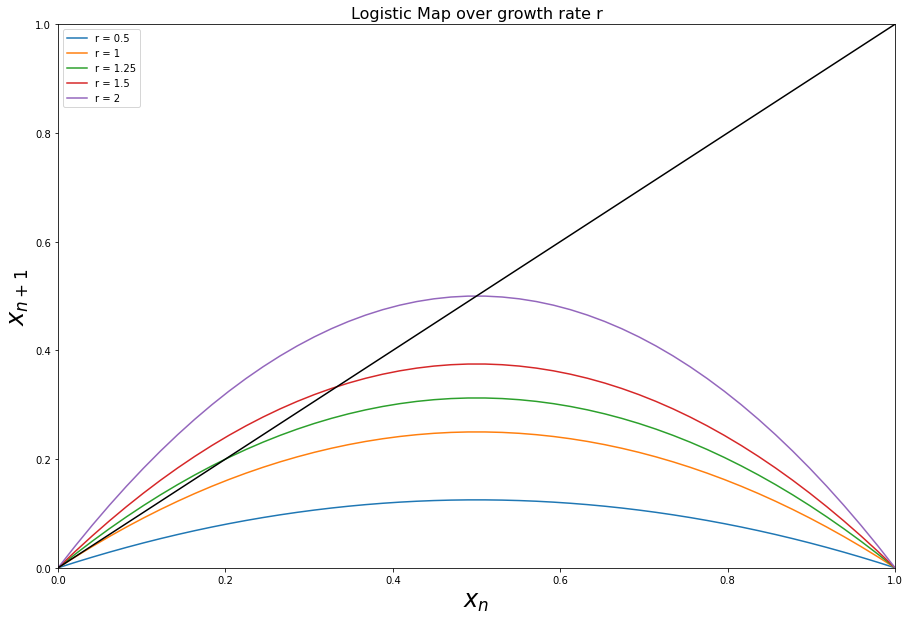

In [3]:
r_values = [0.5, 1, 1.25, 1.5, 2]
plot_logistic_map(r_values)


# Bifurcation Diagram Logistic Map 

A quick way to get an overview of the system behavior is to evaluate the bifurcation diagram of the system. <br>
The following shows the total bifurcation diagram for r $\in$ (0,4].

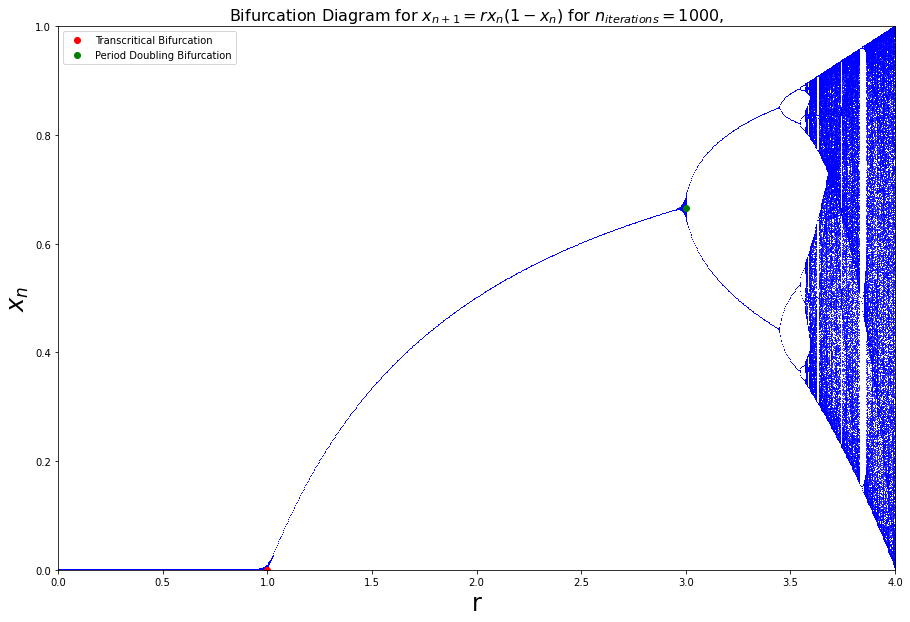

In [4]:
plot_logistic_map_bifurcation(0, 4, 0.2, 1000, 100)


We were able to find stable fixed points for the initial interval $0 < r < 3$. <br>
However, a detailed extract of the diagram reveals that from the value r=3.54 to r=3.57, a periodic doubling of the cluster points of the orbits takes place. <br>
From the value r=3.57, the system falls into a chaotic state. <br>
For individual parameter constellations, there is still a fixed number of cluster points. this can be seen in the diagram by the white stripes  (see r=3.82)  

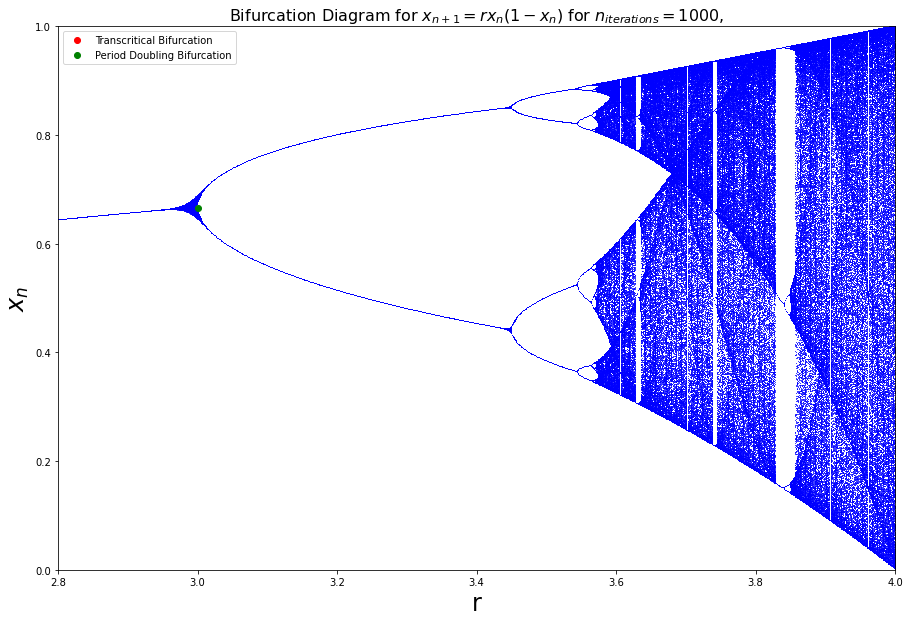

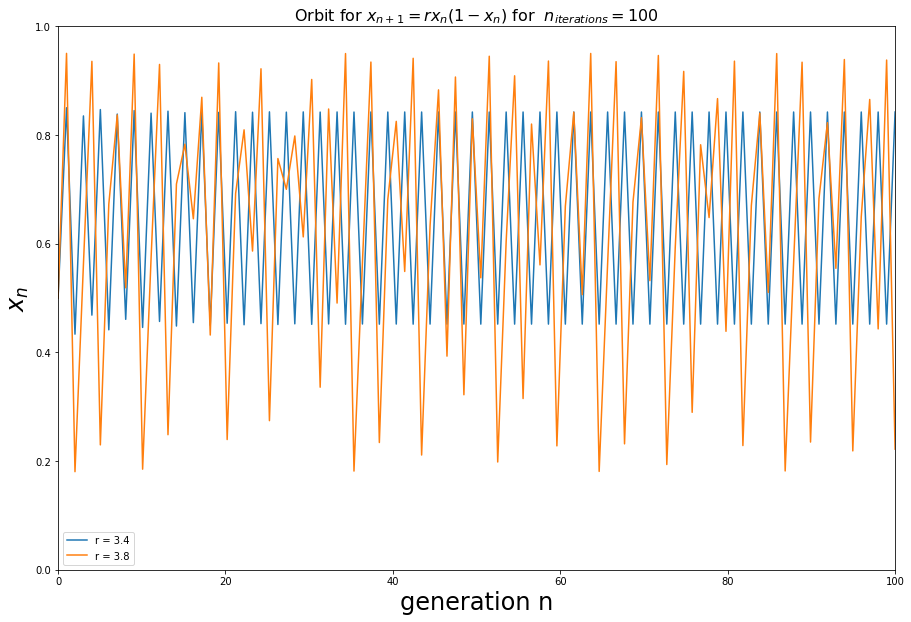

In [5]:
# detail section of the right part of the bifurcation diagram
plot_logistic_map_bifurcation(2.8, 4, 0.2, 1000, 100)

# shows an example of non chaotic and chaotic orbit
orbit_r1, T, r1 = calc_logistic_map_orbit(3.4, 100)
orbit_r2, T, r2 = calc_logistic_map_orbit(3.8, 100)
r_values = [r1, r2]
plot_logistic_map_orbit(T, r_values, orbit_r1, orbit_r2)


# Part 2 - Lorenz Attractor 

The Lorenz attractor is the subset of parameters for which the Lorenz System shows chaotic behaviour. <br>
A possible example of such a parameter combination is given by $\sigma=10$, $\beta=\frac{8}{3}$ and $\rho$=28. <br>
The initial point is chosen as $X_0 = (10,10,10)$.<br>

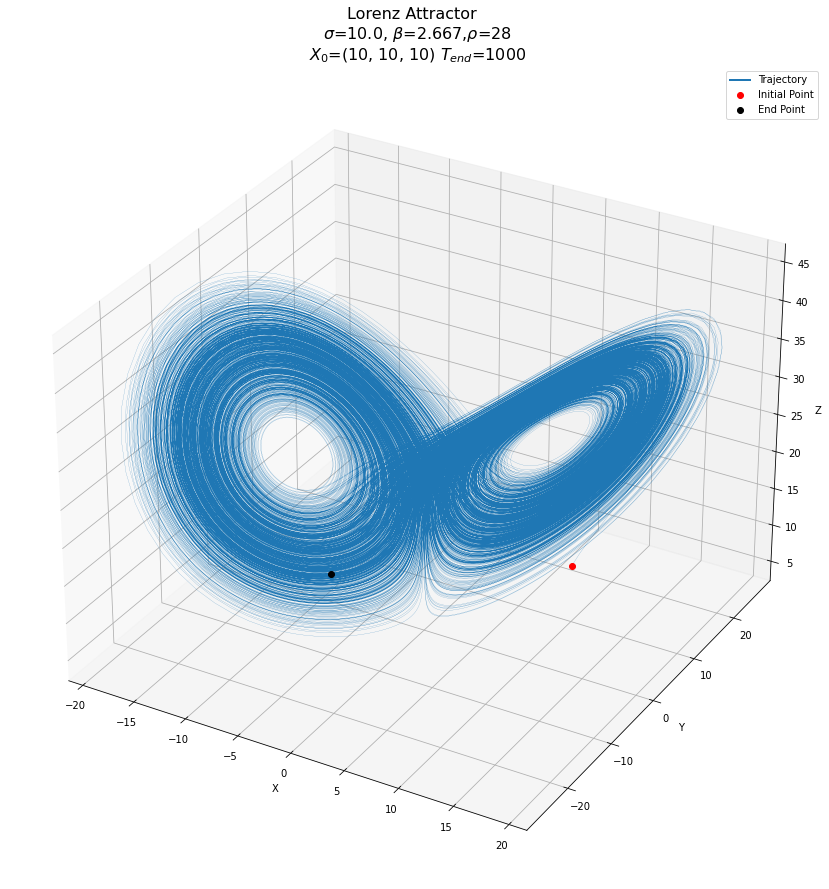

In [6]:
# Initial State
x0 = (10, 10, 10)

# Parameter Settings
sigma = 10.0
beta = 8.0 / 3.0
rho = 28

# Time
T_end = 1000
line_width = 0.15

x_t = calc_lorenz_attractor(sigma, beta, rho, x0, T_end)
plot_lorenz_attractor(x_t, sigma, beta, rho, x0, T_end, line_width)


To see the behavior changes in the strange attractor one can offset the initial point to $\hat{X_0} = (10 + 10^{-8},10,10)$. <br>
By plotting the same parameter set with the new initial point one obtain a fundamentally different trajectory. <br>
This can be seen for example at the location of the end point although the simulation was run $T_{end} = 1000$ long.

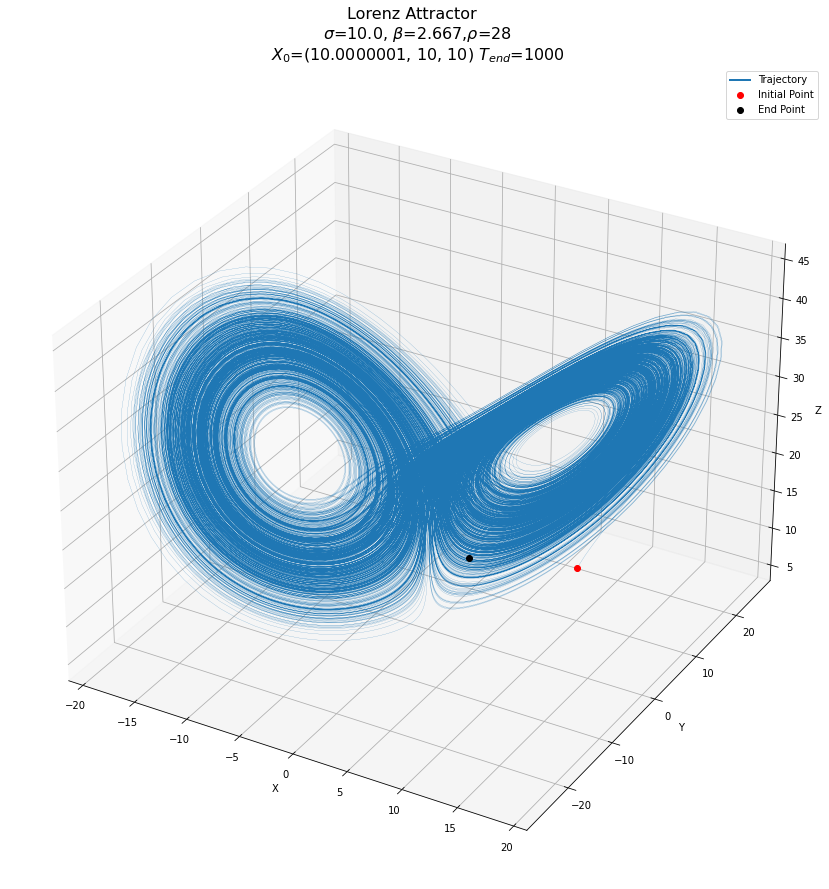

In [7]:
# Initial State
x0_hat = (10 + 10e-8, 10, 10)

# Parameter Settings
sigma = 10.0
beta = 8.0 / 3.0
rho = 28

# Time
T_end = 1000
line_width = 0.15

x_t_hat = calc_lorenz_attractor(sigma, beta, rho, x0_hat, T_end)
plot_lorenz_attractor(x_t_hat, sigma, beta, rho, x0_hat, T_end, line_width)


Sometimes the convergence behavior is difficult to see from the state diagram above, so it is sometimes useful to look at the orbits of each direction over time. <br>
The hows an example application and visualization of the first 10 states of each direction.

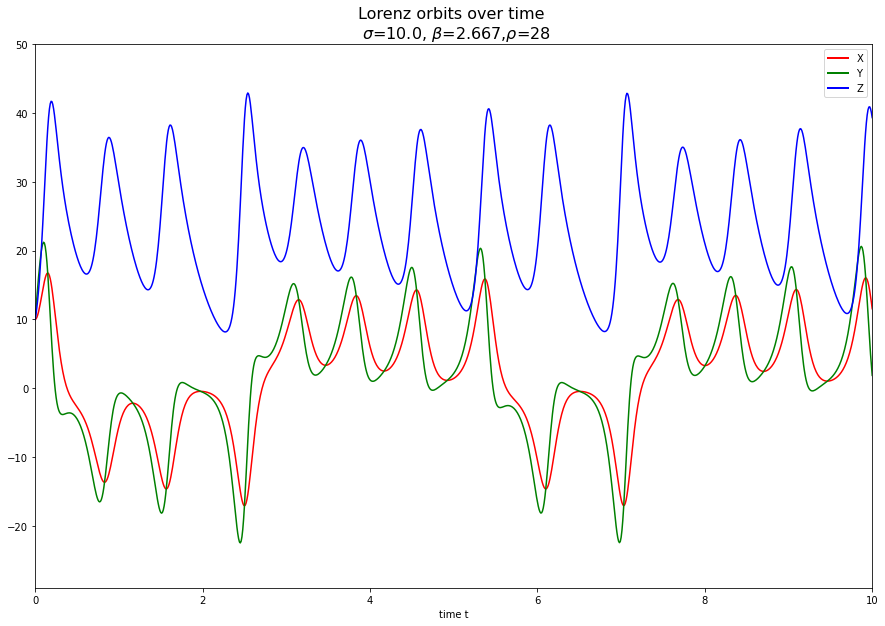

In [8]:
# visualize the orbit over time for all three directions x,y,z

t_min = 0
t_max = 10

plot_lorenz_orbit(x_t, sigma, beta, rho, t_min, t_max)


Another useful evaluation tool is the measurement of the distance between two trajectories. <br>
This is particularly important if you want to check the extent to which parameter changes affect the course of the trajectory i.e. check if the same trajectory is still created. <br>
For this implementation the L2-Norm between two trajectories is created and plotted over all simulation steps. <br>
Since the value of similarity has to be quantified in some way, a distance threshold value was defined below, which can be used as a yardstick. <br>
For this example, it is set as d = 1.The first time this threshold value is exceeded can also be calculated. <br>
This provides information in a console output about the iteration step in which the threshold value was exceeded for the first time and the simulation time step to which this corresponds.

The threshold = 1 was reached after 20.35 simulated seconds (or in iteration step n=2035)


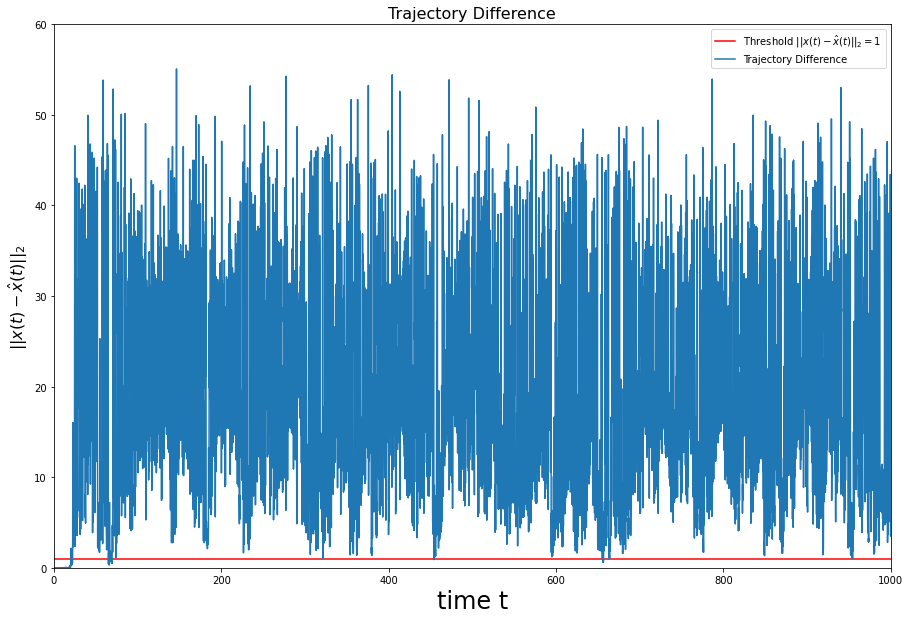

In [9]:
x_t_difference, T = calc_trajectory_difference(x_t, x_t_hat)
plot_trajectory_difference(x_t_difference, T)
calc_trajectory_passing_threshold(x_t_difference, 1, T_end)


The fact that the Lorenz System has different stability states can be seen in the example if one repeats the experiment already carried out above, but this time sets $\rho = 0.5$. 

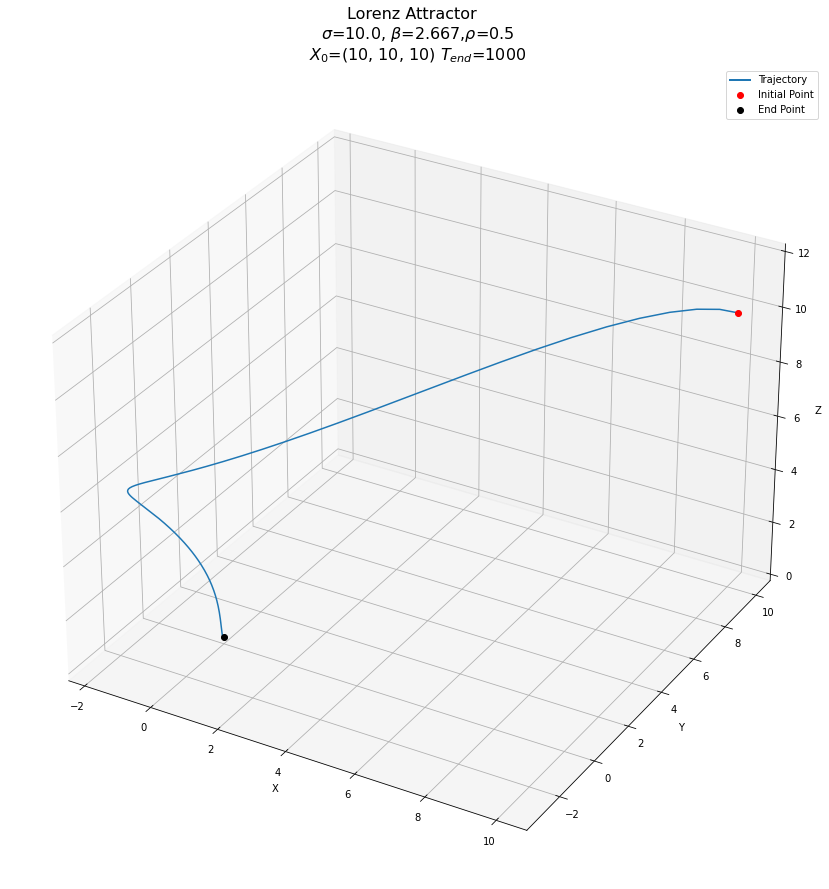

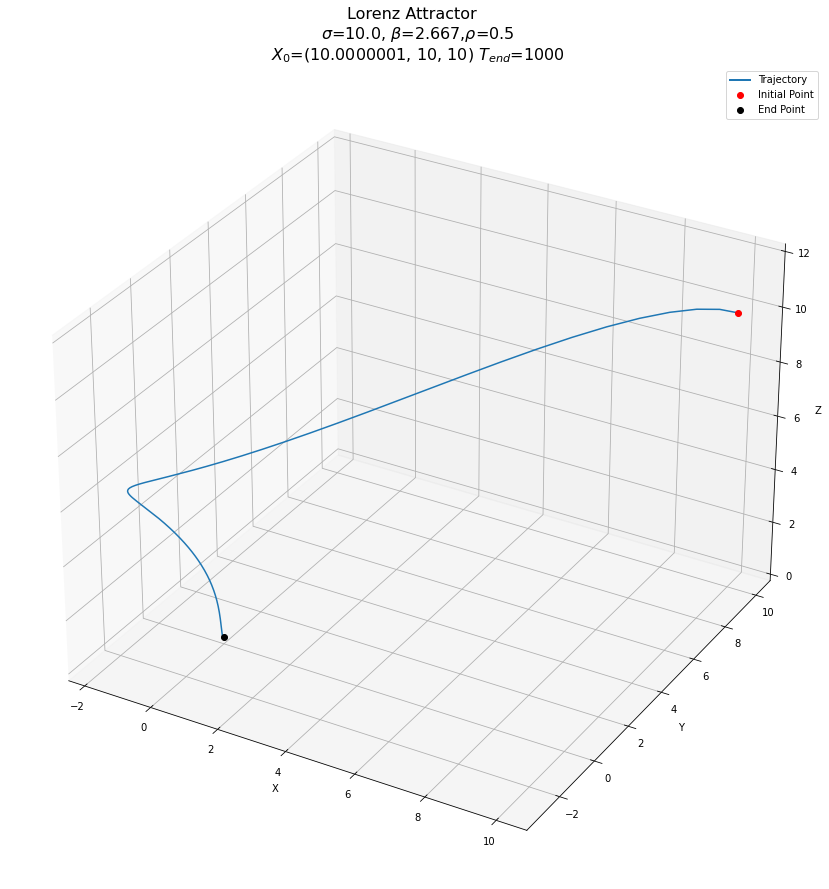

In [10]:
# Initial State
x0 = (10, 10, 10)
x0_hat = (10 + 10e-8, 10, 10)

# Parameter Settings
sigma = 10.0
beta = 8.0 / 3.0
rho = 0.5

# Time
T_end = 1000
line_width = 1.5

x_t = calc_lorenz_attractor(sigma, beta, rho, x0, T_end)
plot_lorenz_attractor(x_t, sigma, beta, rho, x0, T_end, line_width)

x_t_hat = calc_lorenz_attractor(sigma, beta, rho, x0_hat, T_end)
plot_lorenz_attractor(x_t_hat, sigma, beta, rho, x0_hat, T_end, line_width)


The two trajectories look the same, but one can of course calculate and plot the difference to verify this.

The threshold = 1 was never reached in T=1000


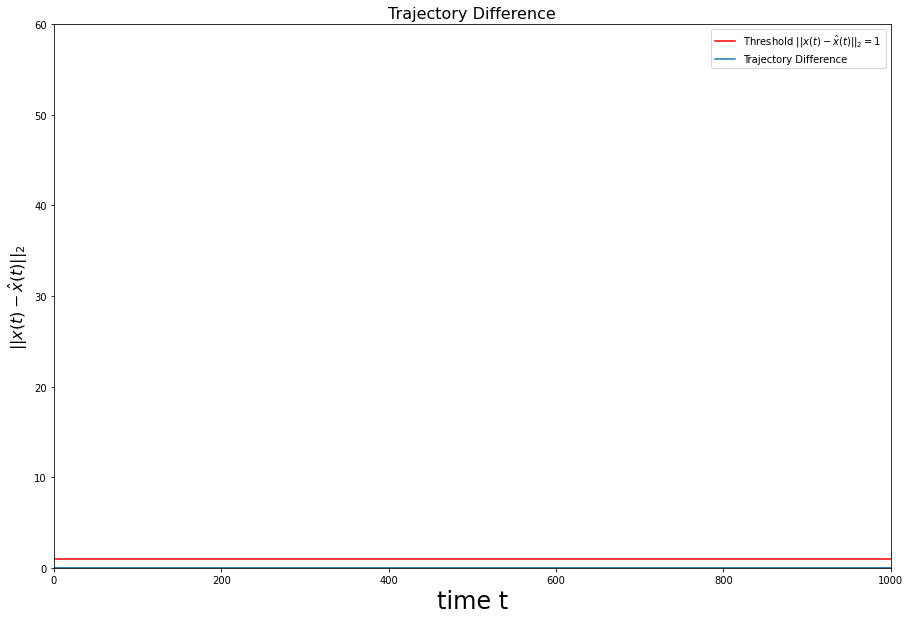

In [11]:
x_t_difference, T = calc_trajectory_difference(x_t, x_t_hat)
plot_trajectory_difference(x_t_difference, T)
calc_trajectory_passing_threshold(x_t_difference, 1, T_end)
